In [1]:
import numpy as np
import random

permuate slices in each patient and the model reads patients one by one

In [57]:
slice_num = 4
patient_num = 12

In [58]:
index_array = []
patient_list = np.random.permutation(patient_num)
for p in patient_list:
    slice_array = np.random.permutation(slice_num)
    for s in slice_array:
        index_array.append([p,s])
print(index_array) 

[[1, 1], [1, 0], [1, 2], [1, 3], [3, 0], [3, 1], [3, 2], [3, 3], [6, 0], [6, 2], [6, 3], [6, 1], [4, 3], [4, 0], [4, 2], [4, 1], [10, 1], [10, 0], [10, 3], [10, 2], [7, 1], [7, 2], [7, 0], [7, 3], [11, 0], [11, 2], [11, 3], [11, 1], [8, 3], [8, 2], [8, 0], [8, 1], [0, 0], [0, 2], [0, 1], [0, 3], [9, 0], [9, 2], [9, 3], [9, 1], [5, 1], [5, 0], [5, 3], [5, 2], [2, 0], [2, 2], [2, 1], [2, 3]]


permutate slices and patients so that model reads N patients in each batch

In [59]:
slice_num = 4
patient_num = 12
total_slice_num = slice_num * patient_num
print(total_slice_num)

48


In [60]:
patient_in_one_batch = 3

In [61]:
index_array = []
patient_list = np.random.permutation(patient_num)
for p in patient_list:
    slice_array = np.random.permutation(slice_num)
    for s in slice_array:
        index_array.append([p,s])
print(index_array)

[[6, 2], [6, 0], [6, 1], [6, 3], [4, 0], [4, 2], [4, 3], [4, 1], [10, 0], [10, 2], [10, 1], [10, 3], [11, 3], [11, 0], [11, 2], [11, 1], [7, 3], [7, 1], [7, 2], [7, 0], [9, 3], [9, 2], [9, 0], [9, 1], [5, 3], [5, 0], [5, 2], [5, 1], [1, 0], [1, 2], [1, 1], [1, 3], [0, 2], [0, 0], [0, 1], [0, 3], [3, 2], [3, 3], [3, 0], [3, 1], [8, 1], [8, 0], [8, 3], [8, 2], [2, 0], [2, 2], [2, 3], [2, 1]]


In [67]:

slices_in_one_group = patient_in_one_batch * slice_num
print(slices_in_one_group)

12


In [66]:
new_index_array = []
for i in range(0,int(patient_num / patient_in_one_batch)):
    g = index_array[slices_in_one_group * i:slices_in_one_group * (i+1)]
    random.shuffle(g)
    new_index_array.extend(g)
print(new_index_array)
    

[[6, 3], [6, 0], [10, 3], [10, 0], [6, 1], [4, 3], [4, 2], [4, 1], [10, 2], [10, 1], [6, 2], [4, 0], [7, 2], [9, 0], [7, 3], [7, 1], [11, 2], [9, 2], [7, 0], [11, 1], [9, 1], [11, 0], [9, 3], [11, 3], [5, 3], [5, 1], [1, 2], [1, 0], [1, 1], [5, 0], [0, 1], [1, 3], [0, 3], [0, 2], [5, 2], [0, 0], [8, 3], [3, 0], [3, 1], [2, 0], [3, 2], [2, 3], [3, 3], [8, 1], [8, 2], [8, 0], [2, 1], [2, 2]]


then in each batch we want to order the index by patients (so the slices from the same patient only need one volume loading)

In [64]:
batch_size = 6
batch_num = int(total_slice_num / batch_size)
print(batch_num)

8


In [65]:
for i in range(0,batch_num):
    array = new_index_array[batch_size * i : batch_size * (i+1)]
    print(array)
    array.sort()
    print(array)
    break

[[10, 0], [4, 1], [6, 1], [10, 3], [4, 3], [6, 0]]
[[4, 1], [4, 3], [6, 0], [6, 1], [10, 0], [10, 3]]


In [82]:
import zc_function_list as ff
import os
import matplotlib.pyplot as plt
f = '/Volumes/McVeighLab/projects/Zhennong/AI/CNN/all-classes-all-phases-0.625/'
p_list = ff.find_all_target_files(['ucsd_siemens/261237'],f)
p = p_list[0]
img = np.load(os.path.join(p,'img-nii-0.625-adapted/0.npy'))
print(img.shape)
#plt.imshow(np.flip(img[:,:,0].T,0),cmap="gray")


(320, 320, 240, 1)


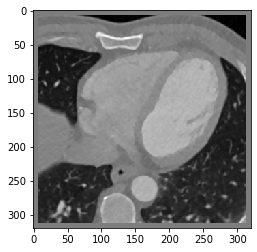

In [84]:
plt.imshow(np.flip(img[:,:,105,0].T,0),cmap="gray")